<h1 align=center>Capítulo 6</h1>
<h2 align=center>Codificação e Processamento de Dados</h2>
<p align=center><img src=https://energiainteligenteufjf.com.br/wp-content/uploads/2021/02/curso-insofti-introducao-ao-processamento-de-dados-ipd.jpg width=500></p>

O foco principal deste capítulo é usar o Python para processar dados apresentados em diferentes tipos de codificações comuns, como arquivos CSV, JSON, XML e registros compactados em binários. Ao contrário do capítulo sobre estruturas de dados, este capítulo não se concentra em algoritmos específicos, mas no problema de obter e retirar dados de um programa.

## 6.1. Lendo e gravando dados CSV

**Problema**

Você deseja ler ou gravar dados codificados como um arquivo CSV.

**Solução**

Para a maioria dos tipos de dados CSV, use a biblioteca `csv`. Por exemplo, suponha que você tenha alguns dados do mercado de ações em um arquivo chamado *stocks.csv* assim:
~~~python
 Symbol,Price,Date,Time,Change,Volume
 "AA",39.48,"6/11/2007","9:36am",-0.18,181800
 "AIG",71.38,"6/11/2007","9:36am",-0.15,195500
 "AXP",62.58,"6/11/2007","9:36am",-0.46,935000
 "BA",98.31,"6/11/2007","9:36am",+0.12,104800
 "C",53.08,"6/11/2007","9:36am",-0.25,360900
 "CAT",78.29,"6/11/2007","9:36am",-0.23,225400
~~~


In [ ]:
import csv
with open('stocks.csv') as f:
    f_csv = csv.reader(f)
    headers = next(f_csv)
    for row in f_csv:
        print(row)

No código anterior, *row* será uma tupla. Assim, para acessar determinados campos, você precisará usar indexação, como row[0] (Símbolo) e row[4] (Alterar).
Como essa indexação geralmente pode ser confusa, este é um lugar onde você pode querer considerar o uso de tuplas nomeadas. Por exemplo:
~~~python
from collections import namedtuple
with open('stock.csv') as f:
 f_csv = csv.reader(f)
 headings = next(f_csv)
 Row = namedtuple('Row', headings)
 for r in f_csv:
 row = Row(*r)
 # Process row
 ...
~~~


Isso permitiria que você usasse os cabeçalhos das colunas, como `row.Symbol` e `row.Change`, em vez de índices. Deve-se notar que isso só funciona se os cabeçalhos das colunas forem identificadores Python válidos. Caso contrário, talvez seja necessário massagear os títulos iniciais (por exemplo, substituindo caracteres não identificadores por sublinhados ou similares).

Outra alternativa é ler os dados como uma sequência de dicionários. Para isso, use este código:

In [ ]:
print('Reading as dicts')
with open('stocks.csv') as f:
    f_csv = csv.DictReader(f)
    for row in f_csv:
        # process row
        print('    ', row)

Reading as dicts
     {'Symbol': 'AA', 'Price': '39.48', 'Date': '6/11/2007', 'Time': '9:36am', 'Change': '-0.18', 'Volume': '181800'}
     {'Symbol': 'AIG', 'Price': '71.38', 'Date': '6/11/2007', 'Time': '9:36am', 'Change': '-0.15', 'Volume': '195500'}
     {'Symbol': 'AXP', 'Price': '62.58', 'Date': '6/11/2007', 'Time': '9:36am', 'Change': '-0.46', 'Volume': '935000'}


Nesta versão, você acessaria os elementos de cada linha usando os cabeçalhos de linha. Por exemplo, row['Symbol'] ou row['Change']. 

Para gravar dados CSV, você também usa o módulo `csv`, mas cria um objeto de gravação. Por exemplo:

In [ ]:
headers = ['Symbol','Price','Date','Time','Change','Volume']
rows = [('AA', 39.48, '6/11/2007', '9:36am', -0.18, 181800),
        ('AIG', 71.38, '6/11/2007', '9:36am', -0.15, 195500),
        ('AXP', 62.58, '6/11/2007', '9:36am', -0.46, 935000),
       ]
with open('stocks.csv','w') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(headers)
    f_csv.writerows(rows)

Se você tiver os dados como uma sequência de dicionários, faça o seguinte:

In [ ]:
headers = ['Symbol', 'Price', 'Date', 'Time', 'Change', 'Volume']
rows = [{'Symbol':'AA', 'Price':39.48, 'Date':'6/11/2007','Time':'9:36am', 'Change':-0.18, 'Volume':181800},
        {'Symbol':'AIG', 'Price': 71.38, 'Date':'6/11/2007','Time':'9:36am', 'Change':-0.15, 'Volume': 195500},
        {'Symbol':'AXP', 'Price': 62.58, 'Date':'6/11/2007','Time':'9:36am', 'Change':-0.46, 'Volume': 935000},
       ]

with open('stocks.csv','w') as f:
    f_csv = csv.DictWriter(f, headers)
    f_csv.writeheader()
    f_csv.writerows(rows)

**Discussão**

Você quase sempre deve preferir o uso do módulo `csv` em vez de tentar manualmente dividir e analisar os dados CSV. Por exemplo, você pode estar inclinado a apenas escrever algum código como este:

In [ ]:
with open('stocks.csv') as f:
    for line in f:
        row = line.split(',')
        print(row)
        # process row


['Symbol', 'Price', 'Date', 'Time', 'Change', 'Volume\n']
['\n']
['AA', '39.48', '6/11/2007', '9:36am', '-0.18', '181800\n']
['\n']
['AIG', '71.38', '6/11/2007', '9:36am', '-0.15', '195500\n']
['\n']
['AXP', '62.58', '6/11/2007', '9:36am', '-0.46', '935000\n']
['\n']


O problema com essa abordagem é que você ainda precisará lidar com alguns detalhes desagradáveis. Por exemplo, se algum dos campos estiver entre aspas, você terá que remover as aspas. Além disso, se um campo entre aspas contiver uma vírgula, o código será interrompido produzindo uma linha com o tamanho errado.

Por padrão, a biblioteca `csv` é programada para entender as regras de codificação CSV usadas pelo Microsoft Excel. Esta é provavelmente a variante mais comum e provavelmente lhe dará a melhor compatibilidade. No entanto, se você consultar a documentação do `csv`, verá algumas maneiras de ajustar a codificação para diferentes formatos (por exemplo, alterando o caractere separador etc.). Por exemplo, se você quiser ler dados delimitados por tabulação, use isto:

In [ ]:
# Example of reading tab-separated values
with open('stocks.tsv') as f:
    f_tsv = csv.reader(f, delimiter='\t')
    for row in f_tsv:
        # Process row
        print(row)


['Symbol', 'Price', 'Date', 'Time', 'Change', 'Volume']
['AA', '39.48', '6/11/2007', '9:36am', '-0.18', '181800']
['AIG', '71.38', '6/11/2007', '9:36am', '-0.15', '195500']
['AXP', '62.58', '6/11/2007', '9:36am', '-0.46', '935000']
['BA', '98.31', '6/11/2007', '9:36am', '+0.12', '104800']
['C', '53.08', '6/11/2007', '9:36am', '-0.25', '360900']
['CAT', '78.29', '6/11/2007', '9:36am', '-0.23', '225400']


Se você estiver lendo dados CSV e convertendo-os em tuplas nomeadas, precisará ter um pouco de cuidado ao validar os cabeçalhos das colunas. Por exemplo, um arquivo CSV pode ter uma linha de cabeçalho contendo caracteres identificadores inválidos como este:
~~~python
Street Address,Num-Premises,Latitude,Longitude
5412 N CLARK,10,41.980262,-87.668452
~~~

Isso fará com que a criação de uma tupla nomeada falhe com uma exceção `ValueError`. Para contornar isso, talvez seja necessário esfregar os cabeçalhos primeiro. Por exemplo, carregando uma substituição regex em caracteres identificadores inválidos como este:

In [ ]:
import re
from collections import namedtuple
with open('stocks.tsv') as f:
    f_csv = csv.reader(f, delimiter='\t')
    headers = [ re.sub('[^a-zA-Z_]', '_', h) for h in next(f_csv) ]
    Row = namedtuple('Row', headers)
    for r in f_csv:
        row = Row(*r)

Também é importante enfatizar que o `csv` não tenta interpretar os dados ou convertê-los para um tipo diferente de uma *string*. Se essas conversões forem importantes, isso é algo que você precisará fazer sozinho. Aqui está um exemplo de como realizar conversões de tipo extra em dados CSV:

In [ ]:
col_types = [str, float, str, str, float, int]
with open('stocks.csv') as f:
    f_csv = csv.reader(f)
    headers = next(f_csv)
    for row in f_csv:
        # Apply conversions to the row items
        row = tuple(convert(value) for convert, value in zip(col_types, row))
        print(row)

()
('AA', 39.48, '6/11/2007', '9:36am', -0.18, 181800)
()
('AIG', 71.38, '6/11/2007', '9:36am', -0.15, 195500)
()
('AXP', 62.58, '6/11/2007', '9:36am', -0.46, 935000)
()


Alternativamente, aqui está um exemplo de conversão de campos selecionados de dicionários:

In [ ]:
print('Reading as dicts with type conversion')
field_types = [ ('Price', float),('Change', float), ('Volume', int)]
with open('stocks.csv') as f:
    for row in csv.DictReader(f):
        row.update((key, conversion(row[key]))
                   for key, conversion in field_types)
        print(row)

Reading as dicts with type conversion
{'Symbol': 'AA', 'Price': 39.48, 'Date': '6/11/2007', 'Time': '9:36am', 'Change': -0.18, 'Volume': 181800}
{'Symbol': 'AIG', 'Price': 71.38, 'Date': '6/11/2007', 'Time': '9:36am', 'Change': -0.15, 'Volume': 195500}
{'Symbol': 'AXP', 'Price': 62.58, 'Date': '6/11/2007', 'Time': '9:36am', 'Change': -0.46, 'Volume': 935000}


Em geral, você provavelmente vai querer ter um pouco de cuidado com essas conversões. No mundo real, é comum que os arquivos CSV tenham valores ausentes, dados corrompidos e outros problemas que interromperiam as conversões de tipo. Portanto, a menos que seus dados sejam garantidos como livres de erros, isso é algo que você precisará considerar (talvez seja necessário adicionar tratamento de exceção adequado).

Por fim, se seu objetivo ao ler dados CSV é realizar análises e estatísticas de dados, convém examinar o pacote Pandas. Pandas inclui uma função conveniente `pandas.read_csv()` que carregará dados CSV em um objeto DataFrame. A partir daí, você pode gerar várias estatísticas resumidas, filtrar os dados e realizar outros tipos de operações de alto nível. Um exemplo é dado na Receita 6.13.

## 6.2. Lendo e gravando dados JSON

**Problema**

Você deseja ler ou gravar dados codificados como JSON (JavaScript Object Notation).

**Solução**

O módulo `json` fornece uma maneira fácil de codificar e decodificar dados em JSON. As duas funções principais são `json.dumps()` e `json.loads()`, espelhando a interface usada em outras bibliotecas de serialização, como `pickle`. Veja como você transforma uma estrutura de dados Python em JSON:

In [ ]:
import json
data = {
    'name' : 'ACME',
    'shares' : 100,
    'price' : 542.23
}

json_str = json.dumps(data)

Veja como você transforma uma string codificada em JSON de volta em uma estrutura de dados Python:

In [ ]:
data = json.loads(json_str)

Se estiver trabalhando com arquivos em vez de strings, você pode usar alternativamente `json.dump()` e `json.load()` para codificar e decodificar dados JSON. Por exemplo:

In [ ]:
# Writing JSON data
with open('data.json', 'w') as f:
    json.dump(data, f)

In [ ]:
# Reading data back
with open('data.json', 'r') as f:
    data = json.load(f)

**Discussão**

A codificação JSON oferece suporte aos tipos básicos de **None**, **bool**, **int**, **float** e **str**, bem como listas, tuplas e dicionários que contêm esses tipos. Para dicionários, as chaves são consideradas strings (qualquer chave não string em um dicionário é convertida em strings durante a codificação).Para estar em conformidade com a especificação JSON, você deve codificar apenas listas e dicionários do Python. Além disso, em aplicativos da Web, é prática padrão que o objeto de nível superior seja um dicionário.

O formato da codificação JSON é quase idêntico à sintaxe do Python, exceto por algumas pequenas alterações. Por exemplo, `True` é mapeado para **true**, `False` é mapeado para **false** e `None` é mapeado para **null**. Aqui está um exemplo que mostra como a codificação se parece:

In [ ]:
json.dumps(False)

'false'

In [ ]:
d = {'a': True,
     'b': 'Hello',
     'c': None}
json.dumps(d)

'{"a": true, "b": "Hello", "c": null}'

Se você estiver tentando examinar os dados que decodificou do JSON, muitas vezes pode ser difícil determinar sua estrutura simplesmente imprimindo-os, especialmente se os dados contiverem um nível profundo de estruturas aninhadas ou muitos campos. Para ajudar com isso, considere usar a função `pprint()` no módulo `pprint`. Isso alfabetizará as chaves e produzirá um dicionário de uma maneira mais sã. Aqui está um exemplo que ilustra como você imprimiria os resultados de uma pesquisa no Twitter:

In [ ]:
from urllib.request import urlopen
import json
u = urlopen('https://nominatim.openstreetmap.org/search.php?q=Manaus&format=jsonv2')
resp = json.loads(u.read().decode('utf-8'))
from pprint import pprint
pprint(resp)

[{'boundingbox': ['-3.222', '-1.924', '-60.801', '-59.16'],
  'category': 'boundary',
  'display_name': 'Manaus, Região Geográfica Imediata de Manaus, Região '
                  'Geográfica Intermediária de Manaus, Amazonas, Região Norte, '
                  '69000-000, Brasil',
  'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png',
  'importance': 0.6822901469283741,
  'lat': '-3.1316333',
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
             'https://osm.org/copyright',
  'lon': '-59.9825041',
  'osm_id': 332493,
  'osm_type': 'relation',
  'place_id': 297367104,
  'place_rank': 16,
  'type': 'administrative'},
 {'boundingbox': ['-3.222', '-1.924', '-60.801', '-59.16'],
  'category': 'boundary',
  'display_name': 'Manaus, Região Geográfica Imediata de Manaus, Região '
                  'Geográfica Intermediária de Manaus, Amazonas, Região Norte, '
                  '69000-000, Brasil',
  'icon': 'https://nominatim.openstr

Normalmente, a decodificação JSON criará dicts ou listas a partir dos dados fornecidos. Se você deseja criar diferentes tipos de objetos, forneça o *object_pairs_hook* ou *object_hook* para `json.loads()`. Por exemplo, aqui está como você decodificaria dados JSON, preservando sua ordem em um `OrderedDict`:

In [ ]:
s = '{"name": "ACME", "shares": 50, "price": 490.1}'
from collections import OrderedDict
data = json.loads(s, object_pairs_hook=OrderedDict)
data

OrderedDict([('name', 'ACME'), ('shares', 50), ('price', 490.1)])

Aqui está como você pode transformar um dicionário JSON em um objeto Python:

In [ ]:
class JSONObject:
    def __init__(self, d):
        self.__dict__ = d

In [ ]:
data = json.loads(s, object_hook=JSONObject)

In [ ]:
 data.name

'ACME'

In [ ]:
 data.shares

50

In [ ]:
data.price

490.1

Neste último exemplo, o dicionário criado pela decodificação dos dados JSON é passado como um único argumento para `__init__()`. A partir daí, você está livre para usá-lo como quiser, como usá-lo diretamente como o dicionário de instância do objeto.
Existem algumas opções que podem ser úteis para codificar JSON. Se você quiser que a saída seja bem formatada, você pode usar o argumento `indent` para `json.dumps()`. Isso faz com que a saída seja bem impressa em um formato semelhante ao da função `pprint()`. Por exemplo:

In [ ]:
data = {
    'name' : 'ACME',
    'shares' : 100,
    'price' : 542.23
}

print(json.dumps(data))

{"name": "ACME", "shares": 100, "price": 542.23}


In [ ]:
print(json.dumps(data, indent=4))

{
    "name": "ACME",
    "shares": 100,
    "price": 542.23
}


Se você quiser que as chaves sejam classificadas na saída, use o argumento `sort_keys`:

In [ ]:
print(json.dumps(data, sort_keys=True))

{"name": "ACME", "price": 542.23, "shares": 100}


As instâncias normalmente não são serializáveis como JSON. Por exemplo:

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
p = Point(2, 3)

~~~python
json.dumps(p)
Traceback (most recent call last):
 File "<stdin>", line 1, in <module>
 File "/usr/local/lib/python3.3/json/__init__.py", line 226, in dumps
 return _default_encoder.encode(obj)
 File "/usr/local/lib/python3.3/json/encoder.py", line 187, in encode
 chunks = self.iterencode(o, _one_shot=True)
 File "/usr/local/lib/python3.3/json/encoder.py", line 245, in iterencode
 return _iterencode(o, 0)
 File "/usr/local/lib/python3.3/json/encoder.py", line 169, in default
 raise TypeError(repr(o) + " is not JSON serializable")
TypeError: <__main__.Point object at 0x1006f2650> is not JSON serializable
>>>
~~~

Se você deseja serializar instâncias, pode fornecer uma função que recebe uma instância como entrada e retorna um dicionário que pode ser serializado. Por exemplo:

In [ ]:
def serialize_instance(obj):
    d = { '__classname__' : type(obj).__name__ }
    d.update(vars(obj))
    return d

Se você quiser obter uma instância de volta, você pode escrever um código como este:

In [ ]:
# Dictionary mapping names to known classes
classes = {
    'Point' : Point
}

def unserialize_object(d):
    clsname = d.pop('__classname__', None)
    if clsname:
        cls = classes[clsname]
        obj = cls.__new__(cls) # Make instance without calling __init__
        for key, value in d.items():
            setattr(obj, key, value)
            return obj
    else:
        return d


Aqui está um exemplo de como essas funções são usadas:

In [ ]:
p = Point(2,3)
s = json.dumps(p, default=serialize_instance)
s

'{"__classname__": "Point", "x": 2, "y": 3}'

In [ ]:
a = json.loads(s, object_hook=unserialize_object)
a

In [ ]:
a.x

2

O módulo json tem uma variedade de outras opções para controlar a interpretação de números de baixo nível, valores especiais como NaN e muito mais. Consulte a documentação para mais detalhes.

## 6.3. Analisando dados XML simples

**Problema**

Você gostaria de extrair dados de um documento XML simples.

**Solução**
O módulo `xml.etree.ElementTree` pode ser usado para extrair dados de documentos XML simples. Para ilustrar, suponha que você queira analisar e fazer um resumo do feed RSS no Planet Python. Aqui está um script que fará isso:

In [ ]:
from urllib.request import urlopen
from xml.etree.ElementTree import parse
# Download the RSS feed and parse it
u = urlopen('http://planet.python.org/rss20.xml')
doc = parse(u)

In [ ]:
# Extract and output tags of interest
for item in doc.iterfind('channel/item'):
    title = item.findtext('title')
    date = item.findtext('pubDate')
    link = item.findtext('link')
    print(title)
    print(date)
    print(link)
    print()

Sebastian Witowski: How to Benchmark (Python) Code
Wed, 16 Nov 2022 16:40:15 +0000
https://switowski.com/blog/how-to-benchmark-python-code/

Real Python: Python REST APIs With Flask, Connexion, and SQLAlchemy – Part 2
Wed, 16 Nov 2022 14:00:00 +0000
https://realpython.com/flask-connexion-rest-api-part-2/

Python for Beginners: Custom JSON Decoder in Python
Wed, 16 Nov 2022 14:00:00 +0000
https://www.pythonforbeginners.com/basics/custom-json-decoder-in-python

Kushal Das: Johnnycanencrypt 0.11.0 released
Wed, 16 Nov 2022 12:53:31 +0000
https://kushaldas.in/posts/johnnycanencrypt-0-11-0-released.html

Django Weblog: 2023 DSF Board Candidates
Wed, 16 Nov 2022 02:36:01 +0000
https://www.djangoproject.com/weblog/2022/nov/15/2023-dsf-board-candidates-list/

Brett Cannon: MVPy: Minimum Viable Python
Wed, 16 Nov 2022 01:01:00 +0000
https://snarky.ca/mvpy-minimum-viable-python/

Brett Cannon: Unravelling `lambda` expressions
Wed, 16 Nov 2022 01:00:29 +0000
https://snarky.ca/unraveling-lambda-ex

Obviamente, se você quiser fazer mais processamento, precisará substituir as instruções `print()` por algo mais interessante.

**Discussão**

Trabalhar com dados codificados como XML é comum em muitos aplicativos. O XML não é apenas amplamente usado como formato para troca de dados na Internet, mas também é um formato comum para armazenar dados de aplicativos (por exemplo, processamento de texto, bibliotecas de música etc.). A discussão a seguir já pressupõe que o leitor esteja familiarizado com os fundamentos do XML.

Em muitos casos, quando o XML está simplesmente sendo usado para armazenar dados, a estrutura do documento é compacta e direta. Por exemplo, o feed RSS do exemplo é semelhante ao seguinte:

~~~html
<?xml version="1.0"?>
 <rss version="2.0" xmlns:dc="http://purl.org/dc/elements/1.1/">
 <channel>
     <title>Planet Python</title>
     <link>http://planet.python.org/</link>
     <language>en</language>
     <description>Planet Python - http://planet.python.org/</description>
     <item>
         <title>Steve Holden: Python for Data Analysis</title>
         <guid>http://holdenweb.blogspot.com/...-data-analysis.html</guid>
         <link>http://holdenweb.blogspot.com/...-data-analysis.html</link>
     <description>...</description>
     <pubDate>Mon, 19 Nov 2012 02:13:51 +0000</pubDate>
     </item>
<item>
    <title>Vasudev Ram: The Python Data model (for v2 and v3)</title>
    <guid>http://jugad2.blogspot.com/...-data-model.html</guid>
    <link>http://jugad2.blogspot.com/...-data-model.html</link>
<description>...</description>
<pubDate>Sun, 18 Nov 2012 22:06:47 +0000</pubDate>
</item>
<item>
    <title>Python Diary: Been playing around with Object Databases</title>
    <guid>http://www.pythondiary.com/...-object-databases.html</guid>
    <link>http://www.pythondiary.com/...-object-databases.html</link>
<description>...</description>
<pubDate>Sun, 18 Nov 2012 20:40:29 +0000</pubDate>
</item>
...
 </channel>
</rss>
~~~

A função `xml.etree.ElementTree.parse()` analisa todo o documento XML em um objeto de documento. A partir daí, você usa métodos como `find()`, `iterfind()` e `findtext()` para pesquisar elementos XML específicos. Os argumentos para essas funções são os nomes de uma tag específica, como canal/item ou título.

Ao especificar tags, você precisa levar em consideração a estrutura geral do documento. Cada operação de localização ocorre em relação a um elemento inicial. Da mesma forma, o tagname que você fornece para cada operação também é relativo ao início. No exemplo, a chamada para `doc.iterfind('canal/item')` procura todos os elementos “item” sob um elemento “canal”. doc representa a parte superior do documento (o elemento “rss” de nível superior). As últimas chamadas para `item.findtext()` ocorrem em relação aos elementos “item” encontrados.

Cada elemento representado pelo módulo `ElementTree` tem alguns atributos e métodos essenciais que são úteis ao analisar. O atributo tag contém o nome da tag, o atributo text contém texto incluído e o método `get()` pode ser usado para extrair atributos (se houver). Por exemplo:

In [ ]:
doc

In [ ]:
e = doc.find('channel/title')
e

<Element 'title' at 0x000001DAAE53FB30>

In [ ]:
e.tag

'title'

In [ ]:
e.text

'Planet Python'

In [ ]:
e.get('some_attribute')

Deve-se notar que `xml.etree.ElementTree` não é a única opção para análise XML. Para aplicativos mais avançados, você pode considerar `lxml`. Ele usa a mesma interface de programação do `ElementTree`, então o exemplo mostrado nesta receita funciona da mesma maneira. Você simplesmente precisa alterar a primeira importação `from lxml.etree import parse.lxml` oferece o benefício de ser totalmente compatível com os padrões XML. Também é extremamente **rápido** e oferece suporte para recursos como validação, XSLT e XPath.

## 6.4. Analisando arquivos XML enormes de forma incremental

**Problema**

Você precisa extrair dados de um documento XML enorme usando o mínimo de memória possível.

**Solução**

Sempre que você se deparar com o problema do processamento incremental de dados, você deve pensar em iteradores e geradores. Aqui está uma função simples que pode ser usada para processar de forma incremental arquivos XML enormes usando uma pegada de memória muito pequena:

In [ ]:
from xml.etree.ElementTree import iterparse
def parse_and_remove(filename, path):
    path_parts = path.split('/')
    doc = iterparse(filename, ('start', 'end'))
    # Skip the root element
    next(doc)
    tag_stack = []
    elem_stack = []
    for event, elem in doc:
        if event == 'start':
            tag_stack.append(elem.tag)
            elem_stack.append(elem)
        elif event == 'end':
            if tag_stack == path_parts:
                yield elem
                elem_stack[-2].remove(elem)
            try:
                tag_stack.pop()
                elem_stack.pop()
            except IndexError:
                pass

Para testar a função, agora você precisa encontrar um arquivo XML grande para trabalhar. Muitas vezes você pode encontrar esses arquivos em sites governamentais e de dados abertos. Por exemplo, você pode baixar o banco de dados de buracos de Chicago como XML. No momento da redação deste artigo, o arquivo baixado consiste em mais de 100.000 linhas de dados, que são codificados assim:

Suponha que você queira escrever um script que classifique os CEPs pelo número de relatórios de buracos. Para fazer isso, você poderia escrever um código como este:

In [41]:
from xml.etree.ElementTree import parse
from collections import Counter
potholes_by_zip = Counter()
doc = parse('potholes.xml')
for pothole in doc.iterfind('row/row'):
    potholes_by_zip[pothole.findtext('zip')] += 1
for zipcode, num in potholes_by_zip.most_common():
    print(zipcode, num)

60632 1
60647 1


Esta versão do código é executada com uma pegada de memória de apenas 7 MB—uma enorme economia!

**Discussão**

Esta receita se baseia em dois recursos principais do módulo ElementTree. Primeiro, o método iterparse() permite o processamento incremental de documentos XML. Para usá-lo, você fornece o nome do arquivo junto com uma lista de eventos que consiste em um ou mais dos seguintes:**start**, **end**, **start-ns** e **end-ns**. O iterador criado por `iterparse()` produz tuplas no form(event, elem), onde event é um dos eventos listados e elem é o elemento XML resultante. Por exemplo:

In [42]:
data = iterparse('potholes.xml',('start','end'))

In [43]:
next(data)

('start', <Element 'response' at 0x000001DAAF679E50>)

In [44]:
next(data)

('start', <Element 'row' at 0x000001DAB08FBBD0>)

In [45]:
next(data)

('start', <Element 'row' at 0x000001DAB08FBB80>)

In [46]:
next(data)

('start', <Element 'creation_date' at 0x000001DAB08FB6D0>)

In [47]:
next(data)

('end', <Element 'creation_date' at 0x000001DAB08FB6D0>)

In [48]:
next(data)

('start', <Element 'status' at 0x000001DAAE53F040>)

In [49]:
next(data)

('end', <Element 'status' at 0x000001DAAE53F040>)

Os eventos **start** são criados quando um elemento é criado pela primeira vez, mas ainda não é preenchido com nenhum outro dado (por exemplo, elementos filho). eventos **end** são criados quando um elemento é concluído.

Embora não sejam mostrados nesta receita, os eventos **start-ns** e **end-ns** são usados para manipular declarações de namespace XML.

Nesta receita, os eventos de **start** e **end** são usados para gerenciar pilhas de elementos e tags. As pilhas representam a estrutura hierárquica atual do documento conforme ele está sendo analisado e também são usadas para determinar se um elemento corresponde ao caminho solicitado fornecido à função **parse_and_remove()** . Se uma correspondência for feita, o rendimento é usado para emiti-lo de volta para o chamador.

A seguinte declaração após o **yield** é o recurso principal do **ElementTree** que faz com que essa receita economize memória:
~~~python
elem_stack[-2].remove(elem)
~~~

Essa instrução faz com que o elemento gerado anteriormente seja removido de seu pai.Supondo que nenhuma referência seja deixada a ele em nenhum outro lugar, o elemento é destruído e a memória recuperada.

O efeito **end** da análise iterativa e a remoção de nós é uma varredura incremental altamente eficiente sobre o documento. Em nenhum momento uma árvore de documentos completa é construída. No entanto, ainda é possível escrever código que processe os dados XML de maneira direta.

A principal desvantagem dessa receita é seu desempenho em tempo de execução. Quando testada, a versão do código que lê o documento inteiro na memória primeiro é executada aproximadamente duas vezes mais rápido que a versão que o processa de forma incremental. No entanto, requer mais de 60 vezes mais memória. Portanto, se o uso de memória é uma preocupação maior, a versão incremental é uma grande vitória.

## 6.5. Transformando um dicionário em XML
#### Problema
Você deseja pegar os dados em um dicionário Python e transformá-los em XML.
#### Solução
Embora a biblioteca `xml.etree.ElementTree` seja comumente usada para análise, ela também pode ser usada para criar documentos XML. Por exemplo, considere esta função:

In [50]:
from xml.etree.ElementTree import Element
def dict_to_xml(tag, d):
    '''
    Turn a simple dict of key/value pairs into XML
    '''
    elem = Element(tag)
    for key, val in d.items():
        child = Element(key)
        child.text = str(val)
        elem.append(child)
        return elem

Aqui está um exemplo:

In [51]:
s = { 'name': 'GOOG', 'shares': 100, 'price':490.1 }
e = dict_to_xml('stock', s)
e

<Element 'stock' at 0x000001DAB090DA40>

O resultado dessa conversão é uma ocorrência de Element. Para I/O, é fácil converter isso em uma string de bytes usando a função `tostring()` em `xml.etree.ElementTree`. Por exemplo:

In [52]:
from xml.etree.ElementTree import tostring
tostring(e)

b'<stock><name>GOOG</name></stock>'

Se você deseja anexar atributos a um elemento, use seu método `set()`:

In [53]:
e.set('_id', '1234')
tostring(e)

b'<stock _id="1234"><name>GOOG</name></stock>'

Se a ordem dos elementos for importante, considere fazer um `OrderedDict` em vez de um dicionário normal. Ver Receita 1.7.
#### Discussão
Ao criar XML, você pode estar inclinado a criar apenas strings. Por exemplo:

In [55]:
def dict_to_xml_str(tag, d):
     '''
     Turn a simple dict of key/value pairs into XML
     '''
     parts = ['<{}>'.format(tag)]
     for key, val in d.items():
         parts.append('<{0}>{1}</{0}>'.format(key,val))
         parts.append('</{}>'.format(tag))
         return ''.join(parts)

O problema é que você vai fazer uma verdadeira bagunça para si mesmo se tentar fazer as coisas manualmente. Por exemplo, o que acontece se os valores do dicionário contiverem caracteres especiais como este?

In [56]:
d = { 'name' : '<spam>' }
# String creation
dict_to_xml_str('item',d)

'<item><name><spam></name></item>'

In [57]:
# Proper XML creation
e = dict_to_xml('item',d)
tostring(e)

b'<item><name>&lt;spam&gt;</name></item>'

Observe como no último exemplo, os caracteres < e > foram substituídos por  **&lt** e  **&gt**.

Apenas para referência, se você precisar escapar manualmente ou remover esses caracteres, poderá usar as funções escape() e unescape() em `xml.sax.saxutils`. Por exemplo:

In [58]:
from xml.sax.saxutils import escape, unescape
escape('<spam>')

'&lt;spam&gt;'

In [59]:
unescape('<spam>')

'<spam>'

Além de criar a saída correta, a outra razão pela qual é uma boa ideia criar instâncias de *Element* em vez de strings é que elas podem ser mais facilmente combinadas para criar um documento maior. As instâncias de *Element* resultantes também podem ser processadas de várias maneiras sem a necessidade de se preocupar com a análise do texto XML. Essencialmente, você pode fazer todo o processamento dos dados em um formulário de nível mais alto e, em seguida, exibi-los como uma string no final.

## 6.6. Analisando, modificando e reescrevendo XML
#### Problema
Você deseja ler um documento XML, fazer alterações nele e, em seguida, escrevê-lo novamente como XML.
#### Solução
O módulo xml.etree.ElementTree facilita a execução dessas tarefas. Essencialmente, você começa analisando o documento da maneira usual. Por exemplo, suponha que você tenha um documento chamado pred.xml semelhante a este:
~~~xml
<?xml version="1.0"?>
<stop>
     <id>14791</id>
    <nm>Clark &amp; Balmoral</nm>
    <sri>
        <rt>22</rt>
        <d>North Bound</d>
        <dd>North Bound</dd>
    </sri>
    <cr>22</cr>
    <pre>
        <pt>5 MIN</pt>
        <fd>Howard</fd>
        <v>1378</v>
        <rn>22</rn>
    </pre>
    <pre>
        <pt>15 MIN</pt>
        <fd>Howard</fd>
        <v>1867</v>
        <rn>22</rn>
    </pre>
</stop>
~~~


Aqui está um exemplo de uso do ElementTree para lê-lo e fazer alterações na estrutura:

In [76]:
from xml.etree.ElementTree import parse, Element
doc = parse('pred.xml')
root = doc.getroot()
root

<Element 'stop' at 0x000001DAB0A0A270>

In [77]:
# Remove a few elements
root.remove(root.find('sri'))
root.remove(root.find('cr'))

# Insert a new element after <nm>...</nm>
root.getchildren().index(root.find('nm'))

C:\Users\dell\AppData\Local\Temp\ipykernel_2488\3972933619.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  root.getchildren().index(root.find('nm'))


1

In [79]:
e = Element('spam')
e.text = 'This is a test'
root.insert(2, e)

# Write back to a file
doc.write('newpred.xml', xml_declaration=True)

O resultado dessas operações é um novo arquivo XML com a seguinte aparência:
~~~xml
<?xml version='1.0' encoding='us-ascii'?>
<stop>
     <id>14791</id>
    <nm>Clark &amp; Balmoral</nm>
    <spam>This is a test</spam><spam>This is a test</spam><pre>
        <pt>5 MIN</pt>
        <fd>Howard</fd>
        <v>1378</v>
        <rn>22</rn>
    </pre>
    <pre>
        <pt>15 MIN</pt>
        <fd>Howard</fd>
        <v>1867</v>
        <rn>22</rn>
    </pre>
</stop>
~~~

#### Discussão
Modificar a estrutura de um documento XML é simples, mas lembre-se que todas as modificações são geralmente feitas no elemento pai, tratando-o como se fosse uma lista. Por exemplo, se você remover um elemento, ele será removido de seu pai imediato usando o método `remove()` do pai. Se você inserir ou anexar novos elementos, também usará os métodos `insert()` e `append()` no pai. Os elementos também podem ser manipulados usando operações de indexação e divisão, como element[i] ou element[i:j].

Se você precisar criar novos elementos, use a classe Element, conforme mostrado na solução desta receita. Isso é descrito mais adiante na Receita 6.5.

## 6.7. Analisando documentos XML com namespaces
#### Problema
Você precisa analisar um documento XML, mas está usando namespaces XML.
#### Solução
Considere um documento que usa namespaces como este:
~~~xml
<?xml version="1.0" encoding="utf-8"?>
<top>
    <author>David Beazley</author>
    <content>
        <html xmlns="http://www.w3.org/1999/xhtml">
            <head>
                <title>Hello World</title>
            </head>
            <body>
                <h1>Hello World!</h1>]
            </body>
        </html>
    </content>
</top>
~~~

In [82]:
from xml.etree.ElementTree import parse, Element

doc = parse('file.xml')

doc.findtext('author')

'David Beazley'

In [83]:
doc.find('content')

<Element 'content' at 0x000001DAB0A3B400>

In [84]:
# A query involving a namespace (doesn't work)
doc.find('content/html')

In [85]:
# Works if fully qualified
doc.find('content/{http://www.w3.org/1999/xhtml}html')

<Element '{http://www.w3.org/1999/xhtml}html' at 0x000001DAB0A3B5E0>

In [87]:
# Doesn't work
doc.findtext('content/{http://www.w3.org/1999/xhtml}html/head/title')

In [88]:
# Fully qualified
doc.findtext('content/{http://www.w3.org/1999/xhtml}html/{http://www.w3.org/1999/xhtml}head/{http://www.w3.org/1999/xhtml}title')

'Hello World'

Muitas vezes, você pode simplificar as coisas para si mesmo agrupando a manipulação de namespace em uma classe de utilitário.

In [90]:
class XMLNamespaces:
    def __init__(self, **kwargs):
        self.namespaces = {}
        for name, uri in kwargs.items():
            self.register(name, uri)
    def register(self, name, uri):
        self.namespaces[name] = '{'+uri+'}'

    def __call__(self, path):
        return path.format_map(self.namespaces)

Para usar esta classe, você faz o seguinte:

In [91]:
ns = XMLNamespaces(html='http://www.w3.org/1999/xhtml')
doc.find(ns('content/{html}html'))

<Element '{http://www.w3.org/1999/xhtml}html' at 0x000001DAB0A3B5E0>

In [92]:
doc.findtext(ns('content/{html}html/{html}head/{html}title'))

'Hello World'

#### Discussão
A análise de documentos XML que contêm namespaces pode ser complicada. A classe XMLNamespaces destina-se apenas a limpá-la um pouco, permitindo que você use os nomes de namespace abreviados em operações subsequentes, em vez de URIs totalmente qualificados.

Infelizmente, não há nenhum mecanismo no analisador ElementTree básico para obter mais informações sobre namespaces. No entanto, você pode obter um pouco mais de informação sobre o escopo do processamento de namespace se estiver disposto a usar a função `iterparse()`. Por exemplo:

In [94]:
from xml.etree.ElementTree import iterparse
for evt, elem in iterparse('file.xml', ('end', 'start-ns', 'end-ns')):
    print(evt, elem)

end <Element 'author' at 0x000001DAB0A3C810>
start-ns ('', 'http://www.w3.org/1999/xhtml')
end <Element '{http://www.w3.org/1999/xhtml}title' at 0x000001DAB0A22D10>
end <Element '{http://www.w3.org/1999/xhtml}head' at 0x000001DAB0A22E00>
end <Element '{http://www.w3.org/1999/xhtml}h1' at 0x000001DAB0A22400>
end <Element '{http://www.w3.org/1999/xhtml}body' at 0x000001DAB0A22A40>
end <Element '{http://www.w3.org/1999/xhtml}html' at 0x000001DAB0A22D60>
end-ns None
end <Element 'content' at 0x000001DAB0A3CBD0>
end <Element 'top' at 0x000001DAB0A3C6D0>


In [95]:
elem

<Element 'top' at 0x000001DAB0A3C6D0>

Como observação final, se o texto que você está analisando fizer uso de namespaces além de outros recursos avançados de XML, é realmente melhor usar a biblioteca `lxml` em vez de ElementTree. Por exemplo, lxml oferece melhor suporte para validação de documentos em um DTD, suporte XPath mais completo e outros recursos XML avançados. Esta receita é realmente apenas uma correção simples para tornar a análise um pouco mais fácil.
## 6.8. Interagindo com um problema de banco de dados relacional
Você precisa selecionar, inserir ou excluir linhas em um banco de dados relacional.
#### Solução
Uma forma padrão de representar linhas de dados em Python é como uma sequência de tuplas. Por exemplo:

In [96]:
stocks = [
 ('GOOG', 100, 490.1),
 ('AAPL', 50, 545.75),
 ('FB', 150, 7.45),
 ('HPQ', 75, 33.2),
]

Com os dados neste formato, é relativamente simples interagir com um banco de dados relacional usando a API de banco de dados padrão do Python, conforme descrito em PEP 249. A essência da API é que todas as operações no banco de dados são executadas por consultas SQL. Cada linha de dados de entrada ou saída é representada por uma tupla.

Para ilustrar, você pode usar o módulo `sqlite3` que vem com o Python. Se você estiver usando um banco de dados diferente (por exemplo, MySql, Postgres ou ODBC), será necessário instalar uma versão para apoiá-lo. No entanto, a interface de programação subjacente será praticamente a mesma, se não for idêntica.

O primeiro passo é se conectar ao banco de dados. Normalmente, você executa uma função `connect()`, fornecendo parâmetros como o nome do banco de dados, hostname, nome de usuário, senha e outros detalhes conforme necessário. Por exemplo:

In [97]:
import sqlite3
db = sqlite3.connect('database.db')

Para fazer qualquer coisa com os dados, você cria um cursor. Depois de ter um cursor, você pode começar a executar consultas SQL. Por exemplo:

In [98]:
c= db.cursor()
c.execute('create table portfolio (symbol text, shares integer, price real)')

In [99]:
db.commit()

Para inserir uma sequência de linhas nos dados, use uma instrução como esta:

In [100]:
c.executemany('insert into portfolio values (?,?,?)', stocks)

Para realizar uma consulta, use uma instrução como esta:

In [101]:
for row in db.execute('select * from portfolio'):
    print(row)

('GOOG', 100, 490.1)
('AAPL', 50, 545.75)
('FB', 150, 7.45)
('HPQ', 75, 33.2)


Se você deseja executar consultas que aceitam parâmetros de entrada fornecidos pelo usuário, certifique-se de escapar dos parâmetros usando **?** assim:

In [102]:
min_price = 100
for row in db.execute('select * from portfolio where price >= ?', (min_price,)):
    print(row)

('GOOG', 100, 490.1)
('AAPL', 50, 545.75)


#### Discussão
Em um nível baixo, interagir com um banco de dados é uma coisa extremamente simples de se fazer. Você simplesmente forma instruções SQL e as alimenta no módulo subjacente para atualizar o banco de dados ou recuperar dados. Dito isso, ainda existem alguns detalhes complicados que você precisará resolver caso a caso.

Uma complicação é o mapeamento de dados do banco de dados em tipos Python. Para entradas como datas, é mais comum usar instâncias de data e hora do módulo de data e hora, ou possivelmente carimbos de data e hora do sistema, conforme usado no módulo de hora. Para dados numéricos, especialmente dados financeiros envolvendo decimais, os números podem ser representados como instâncias Decimais do módulo decimal. Infelizmente, o mapeamento exato varia de acordo com o back-end do banco de dados, então você terá que ler a documentação associada.

Outra complicação extremamente crítica diz respeito à formação de strings de instrução SQL. Você nunca deve usar operadores de formatação de string do Python (por exemplo, %) ou o método .format() para criar tais strings. Se os valores fornecidos a esses operadores de formatação forem derivados da entrada do usuário, isso abrirá seu programa para um ataque de injeção de SQL (consulte http://xkcd.com/327). O especial ? curinga em consultas instrui o back-end do banco de dados a usar seu próprio mecanismo de substituição de string, o que (espero) fará isso com segurança.

Infelizmente, há alguma inconsistência nos back-ends do banco de dados em relação ao curinga. Muitos módulos usam ? ou %s, enquanto outros podem usar um símbolo diferente, como :0 ou :1, para se referir aos parâmetros. Novamente, você terá que consultar a documentação do módulo de banco de dados que está usando. O atributo paramstyle de um módulo de banco de dados também contém informações sobre o estilo de citação.

Para simplesmente puxar dados para dentro e para fora de uma tabela de banco de dados, usar a API de banco de dados geralmente é bastante simples. Se você estiver fazendo algo mais complicado, pode fazer sentido usar uma interface de nível superior, como a fornecida por um mapeador objeto-relacional. Bibliotecas como SQLAlchemy permitem que tabelas de banco de dados sejam descritas como classes Python e que operações de banco de dados sejam executadas enquanto ocultam a maior parte do SQL subjacente.

## 6.9. Decodificação e Codificação de Dígitos Hexadecimais
#### Problema
Você precisa decodificar uma string de dígitos hexadecimais em uma string de bytes ou codificar uma string de bytes como hexadecimal.
#### Solução
Se você simplesmente precisa decodificar ou codificar uma string bruta de dígitos hexadecimais, use o módulo binascii. Por exemplo:

In [103]:
# Initial byte string
s = b'hello'

# Encode as hex
import binascii
h = binascii.b2a_hex(s)
h

b'68656c6c6f'

In [104]:
# Decode back to bytes
binascii.a2b_hex(h)

b'hello'

Funcionalidade semelhante também pode ser encontrada no módulo `base64`. Por exemplo:

In [105]:
import base64
h = base64.b16encode(s)
h

b'68656C6C6F'

In [106]:
base64.b16decode(h)

b'hello'

#### Discussão
Na maioria das vezes, a conversão de e para hex é direta usando as funções mostradas. A principal diferença entre as duas técnicas está na dobragem de caixas. As funções `base64.b16decode()` e `base64.b16encode()` operam apenas com letras hexadecimais maiúsculas, enquanto as funções em `binascii` funcionam com qualquer uma das letras.

Também é importante observar que a saída produzida pelas funções de codificação é sempre uma string de bytes. Para coagi-lo para Unicode para saída, pode ser necessário adicionar uma etapa extra de decodificação. Por exemplo:

In [108]:
h == base64.b16encode(s)
print(h)

b'68656C6C6F'


In [109]:
print(h.decode('ascii'))

68656C6C6F


Ao decodificar dígitos hexadecimais, as funções b16decode() e a2b_hex() aceitam bytes ou strings unicode. No entanto, essas strings devem conter apenas dígitos hexadecimais codificados em ASCII.

## 6.10. Base de Decodificação e Codificação64
#### Problema
Você precisa decodificar ou codificar dados binários usando a codificação Base64.
#### Solução
O módulo base64 tem duas funções — b64encode() e b64decode() — que fazem exatamente o que você deseja. Por exemplo:

In [110]:
# Some byte data
s = b'hello'
import base64

# Encode as Base64
a = base64.b64encode(s)
a

b'aGVsbG8='

In [111]:
# Decode from Base64
base64.b64decode(a)

b'hello'

#### Discussão
A codificação Base64 destina-se apenas a ser usada em dados orientados a bytes, como strings de bytes e matrizes de bytes. Além disso, a saída do processo de codificação é sempre uma string de bytes. Se você estiver misturando dados codificados em Base64 com texto Unicode, talvez seja necessário realizar uma etapa extra de decodificação. Por exemplo:

In [112]:
a = base64.b64encode(s).decode('ascii')
a

'aGVsbG8='

Ao decodificar Base64, tanto strings de bytes quanto strings de texto Unicode podem ser fornecidas. No entanto, strings Unicode podem conter apenas caracteres ASCII.

## 6.11. Lendo e escrevendo matrizes binárias de estruturas
#### Problema
Você deseja ler ou gravar dados codificados como uma matriz binária de estruturas uniformes em tuplas do Python.
#### Solução
Para trabalhar com dados binários, use o módulo `struct`. Aqui está um exemplo de código que escreve uma lista de tuplas Python em um arquivo binário, codificando cada tupla como uma estrutura usando struct:

In [113]:
from struct import Struct
def write_records(records, format, f):
    '''
    Write a sequence of tuples to a binary file of structures.
     '''
    record_struct = Struct(format)
    for r in records:
        f.write(record_struct.pack(*r))
        # Example
        if __name__ == '__main__':
            records = [ (1, 2.3, 4.5),
                        (6, 7.8, 9.0),
                        (12, 13.4, 56.7) ]
            with open('data.b', 'wb') as f:
                write_records(records, '<idd', f)

Existem várias abordagens para ler esse arquivo de volta em uma lista de tuplas. Primeiro, se você for ler o arquivo de forma incremental em partes, poderá escrever um código como este:

~~~python
from struct import Struct
def read_records(format, f):
    record_struct = Struct(format)
    chunks = iter(lambda: f.read(record_struct.size), b'')
    return (record_struct.unpack(chunk) for chunk in chunks)
    # Example

# Example
if __name__ == '__main__':
    with open('data.b', 'rb') as f:
        data = f.read()
        for rec in unpack_records('<idd', data):
    # Process rec
    # ...
~~~

Em ambos os casos, o resultado é um iterável que produz as tuplas originalmente armazenadas quando o arquivo foi criado.

#### Discussão

Para programas que devem codificar e decodificar dados binários, é comum usar o módulo `struct`. Para declarar uma nova estrutura, basta criar uma instância de `Struct` como:

~~~python
# Little endian 32-bit integer, two double precision floats
record_struct = Struct('<idd')
~~~

As estruturas são sempre definidas usando um conjunto de códigos de estrutura, como i, d, f e assim por diante [consulte a documentação do Python]. Esses códigos correspondem a tipos de dados binários específicos, como inteiros de 32 bits, flutuantes de 64 bits, flutuantes de 32 bits e assim por diante. O **<** no primeiro caractere especifica a ordem dos bytes. Neste exemplo, está indicando *little endian*. Altere o caractere para **>** para *big endian* ou ! para ordem de byte de rede. A instância **Struct** resultante tem vários atributos e métodos para manipular estruturas desse tipo. O atributo size contém o tamanho da estrutura em bytes, o que é útil em operações de I/O. Os métodos `pack()` e `unpack()` são usados para compactar e descompactar dados. Por exemplo:

In [1]:
from struct import Struct
record_struct = Struct('<idd')
record_struct.size

20

In [2]:
record_struct.pack(1, 2.0, 3.0)

b'\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x08@'

Às vezes, você verá as operações `pack()` e `unpack()` chamadas como funções de nível de módulo, como a seguir:

In [3]:
import struct
struct.pack('<idd', 1, 2.0, 3.0)

b'\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x08@'

In [4]:
struct.unpack('<idd', _)

(1, 2.0, 3.0)

Isso funciona, mas parece menos elegante do que criar uma única instância de **Struct** — especialmente se a mesma estrutura aparecer em vários lugares em seu código. Ao criar uma instância **Struct**, o código de formato é especificado apenas uma vez e todas as operações úteis são agrupadas de maneira adequada. Isso certamente facilita a manutenção do seu código se você precisar mexer no código da estrutura (já que você só precisa alterá-lo em um lugar).

O código para ler estruturas binárias envolve vários idiomas de programação interessantes, mas elegantes. Na função **read_records()**, **iter()** está sendo usado para criar um iterador que retorna blocos de tamanho fixo. Ver Receita 5.8. Esse iterador chama repetidamente um callable fornecido pelo usuário (por exemplo, **lambda: f.read(record_struct.size)**) até retornar um valor especificado (por exemplo, b), ponto em que a iteração para. Por exemplo:

In [6]:
f = open('data', 'rb')
chunks = iter(lambda: f.read(20), b'')
chunks

In [7]:
for chk in chunks:
    print(chk)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

Um motivo para criar um iterável é que ele permite que registros sejam criados usando uma compreensão do gerador, conforme mostrado na solução. Se você não usou essa abordagem, o código pode ficar assim:

In [8]:
def read_records(format, f):
    record_struct = Struct(format)
    while True:
        chk = f.read(record_struct.size)
        if chk == b'':
            break
            yield record_struct.unpack(chk)
            return records

Na função **unpack_records()**, uma abordagem diferente usando o método **unpack_from()** é usada. **unpack_from()** é um método útil para extrair dados binários de uma matriz binária maior, porque o faz sem criar objetos temporários ou cópias de memória. Você apenas fornece uma string de bytes (ou qualquer array) junto com um deslocamento de byte e ele descompacta os campos diretamente desse local.

Se você usou **unpack()** em vez de **unpack_from()**, você precisaria modificar o código para fazer muitas fatias pequenas e cálculos de compensação. Por exemplo:

In [9]:
def unpack_records(format, data):
    record_struct = Struct(format)
    return (record_struct.unpack(data[offset:offset + record_struct.size])
            for offset in range(0, len(data), record_struct.size))

Além de ser mais complicada de ler, esta versão também exige muito mais trabalho, pois realiza vários cálculos de deslocamento, copia dados e faz pequenos objetos fatiados. Se você vai desempacotar muitas estruturas de uma grande string de bytes que você já leu, **unpack_from()** é uma abordagem mais elegante. Desempacotar registros é um lugar onde você pode querer usar objetos namedtuple do módulo collections. Isso permite definir nomes de atributos nas tuplas retornadas. Por exemplo:
~~~python
from collections import namedtuple
Record = namedtuple('Record', ['kind','x','y'])
with open('data', 'rb') as f:
    records = (Record(*r) for r in read_records('<idd', f))
for r in records:
    print(r.kind, r.x, r.y)
   ~~~


Se você estiver escrevendo um programa que precisa trabalhar com uma grande quantidade de dados binários, talvez seja melhor usar uma biblioteca como numpy. Por exemplo, em vez de ler um binário em uma lista de tuplas, você pode lê-lo em uma matriz estruturada, como esta:

In [19]:
import numpy as np
f = open('data', 'rb')
records = np.fromfile(f, dtype='<i,<d,<d')
records

array([(263, 9.0888131e-307, 0.), (  0, 0.0000000e+000, 0.),
       (  0, 0.0000000e+000, 0.), ..., (  0, 0.0000000e+000, 0.),
       (  0, 0.0000000e+000, 0.), (  0, 0.0000000e+000, 0.)],
      dtype=[('f0', '<i4'), ('f1', '<f8'), ('f2', '<f8')])

In [20]:
records[0]

(263, 9.0888131e-307, 0.)

In [21]:
records[1]

(0, 0., 0.)

Por último, mas não menos importante, se você se deparar com a tarefa de ler dados binários em algum formato de arquivo conhecido (ou seja, formatos de imagem, arquivos shape, HDF5, etc.), verifique se já existe um módulo Python para isso. Não há razão para reinventar a roda se você não precisar.
## 6.12. Lendo estruturas binárias aninhadas e de tamanho variável
#### Problema
Você precisa ler dados complicados codificados em binário que contêm uma coleção de registros aninhados e/ou de tamanho variável. Esses dados podem incluir imagens, vídeos, shapefiles e assim por diante.
#### Solução
O módulo `struct` pode ser usado para decodificar e codificar quase qualquer tipo de estrutura de dados binários. Para ilustrar o tipo de dados em questão aqui, suponha que você tenha essa estrutura de dados Python representando uma coleção de pontos que compõem uma série de polígonos:

In [22]:
polys = [
[ (1.0, 2.5), (3.5, 4.0), (2.5, 1.5) ],
[ (7.0, 1.2), (5.1, 3.0), (0.5, 7.5), (0.8, 9.0) ],
[ (3.4, 6.3), (1.2, 0.5), (4.6, 9.2) ],
]

Agora suponha que esses dados sejam codificados em um arquivo binário onde o arquivo começa com o seguinte cabeçalho:

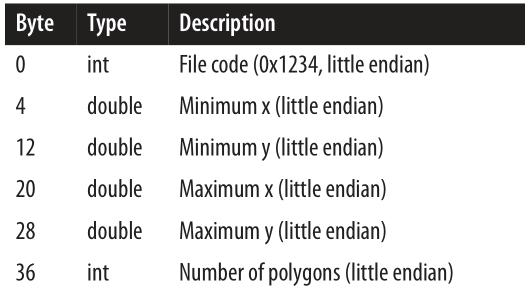

In [23]:
from IPython.display import Image
Image('images/bytes.PNG')